In [55]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [56]:
def cyclePoints(x, y):
    """
        Cycles points in 2 directions (forwards and backwards)
        
        Given 2 dimensional arrays, x and y, the "x" and "y" values are a set of arrays 
        containing three points each representing a polygon. This function finds the best mapping 
        from x and y by using the euclidean distance and cycling the points in "y" in a forward and backwards
        direction.
        
        Parameters
        ----------
        x : int array
          A 2-D array containing 3 points on a plane that the user has selected.
            
        y : int array
          A 2-D array containing 3 points that are a representation of what "x" should be after a 
          certain number of frames. 
          
        
        Returns
        -------
        int 
            d_min, the minimum distance between a vertices in x and y
        int
            i_min, the location of the starting vertex where the minimum value occurs from
    
    """
    d_min = math.inf
    i_min = 0
    c_direction = None
    n = len(x)
    
    for i in range(0, n):
        for l in range(0, 2):
            d = 0
            for j in range(0, n):
                current_x = x[j]
                
                # Use foward cycling if 0
                # Use reverse cycling if 1                    
                current_y = y[(i + j) % n] if l == 0 else y[(i - j) % n]
                result = np.array(current_x) - np.array(current_y) 
                d = d + (np.sum(np.square(result))) # Calculate the euclidean distance
            
            if (d < d_min):
                d_min = d
                i_min = i
                c_direction = l
                
            
    return d_min, i_min, c_direction

In [57]:
x = [[309,189], [310,267], [297,267]] # points on the left screen
y = [[380,267], [350,267], [375,189]] # points on the right screen

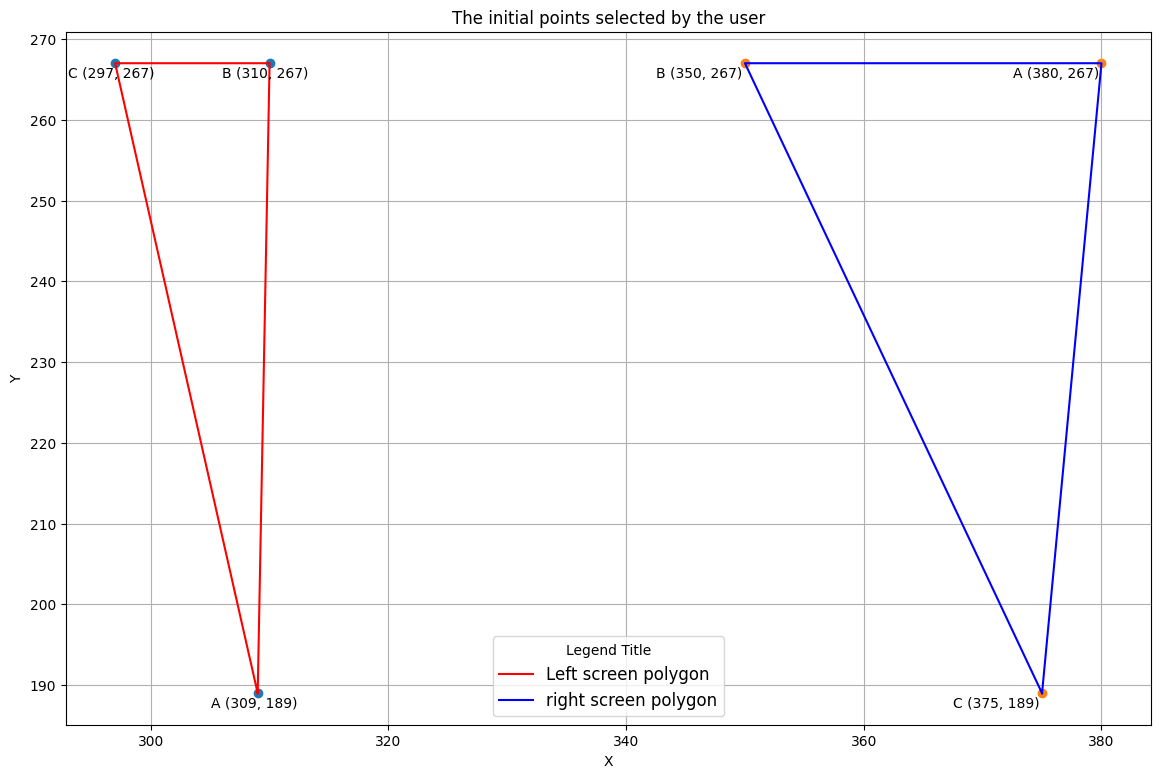

In [58]:
# Define the coordinates of the triangle vertices
x_1 = [309, 310, 297]    #x-coordinates
y_1 = [189, 267, 267]    # y-coordinates

x_2 = [375, 350, 380]    #x-coordinates
y_2 = [189, 267, 267]    # y-coordinates

plt.figure(figsize=(14, 9))

labels_left = ['A', 'B', 'C']
labels_right = ['C', 'B', 'A']
           
# Plot the triangle
plt.plot(x_1 + [x_1[0]], y_1 + [y_1[0]], 'r-', label="Left screen polygon")  # Connect the last point to the first point to close the triangle
plt.plot(x_2 + [x_2[0]], y_2 + [y_2[0]], 'b-', label="right screen polygon")  # Connect the last point to the first point to close the triangle

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

# Annotate the points on the graph
for i in range(len(x)):
    plt.annotate(f"{labels_left[i]} ({x_1[i]}, {y_1[i]})", (x_1[i] - 1.5 , y_1[i]), textcoords="offset points", xytext=(10,-10), ha='center')
    plt.annotate(f"{labels_right[i]} ({x_2[i]}, {y_2[i]})", (x_2[i] - 5, y_2[i]), textcoords="offset points", xytext=(10,-10), ha='center')

    
plt.legend(loc='lower center', title='Legend Title', fontsize='large')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The initial points selected by the user')
plt.grid(True)
plt.show()

In [59]:
min_dist, tuple_index, direction = cyclePoints(x, y)
if (direction == 0):
    y = np.concatenate((y[tuple_index:], y[:tuple_index]))
    print(y)
else:
    index_item = y.pop(tuple_index)

    if tuple_index != 1:
        y.reverse()
    
    y.insert(0, index_item)
    print(y)

[[375 189]
 [380 267]
 [350 267]]


In [60]:
min_dist, tuple_index

(12065, 2)

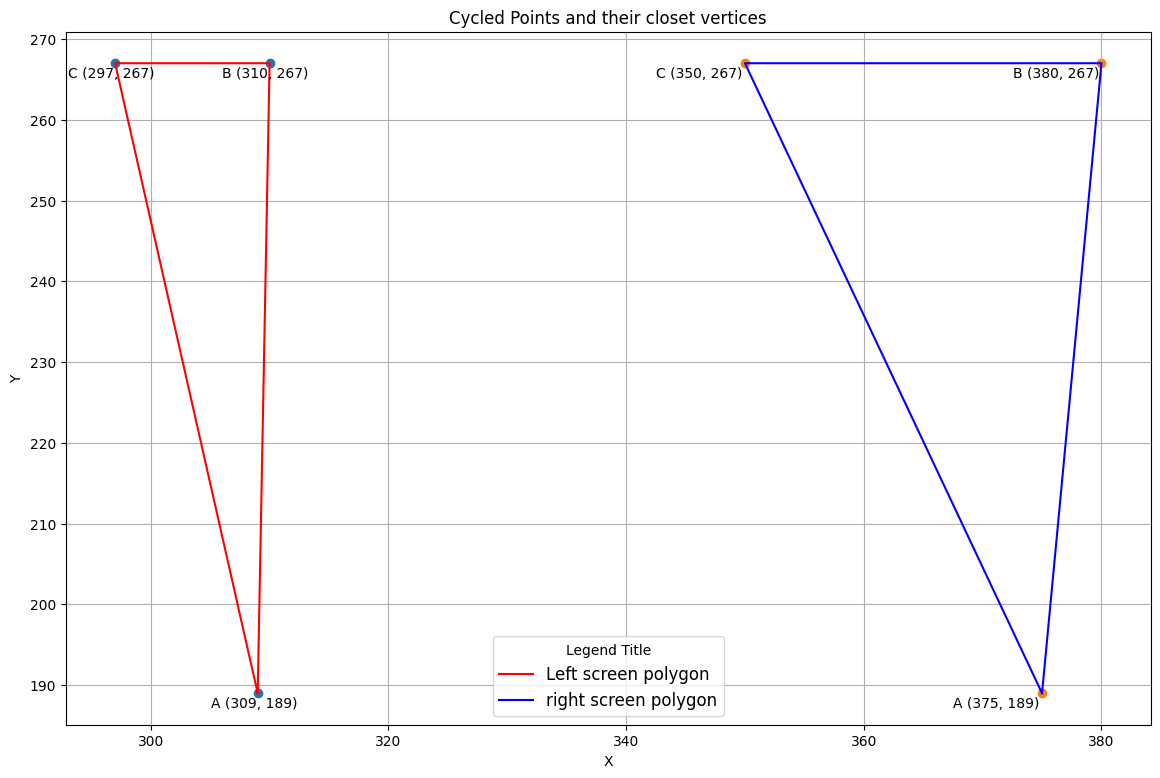

In [61]:
# Define the coordinates of the triangle vertices
x_1 = [309, 310, 297]    # x-coordinates
y_1 = [189, 267, 267]    # y-coordinates

x_2 = [375, 380, 350]    # x-coordinates
y_2 = [189, 267, 267]    # y-coordinates

plt.figure(figsize=(14, 9))

labels_left = ['A', 'B', 'C']
labels_right = ['A', 'B', 'C']
           
# # Plot the triangle
plt.plot(x_1 + [x_1[0]], y_1 + [y_1[0]], 'r-', label="Left screen polygon")  # Connect the last point to the first point to close the triangle
plt.plot(x_2 + [x_2[0]], y_2 + [y_2[0]], 'b-', label="right screen polygon")  # Connect the last point to the first point to close the triangle

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

for i in range(len(x)):
    # Annotate points on the graph
    plt.annotate(f"{labels_left[i]} ({x_1[i]}, {y_1[i]})", (x_1[i] - 1.5 , y_1[i]), textcoords="offset points", xytext=(10,-10), ha='center')
    plt.annotate(f"{labels_right[i]} ({x_2[i]}, {y_2[i]})", (x_2[i] - 5, y_2[i]), textcoords="offset points", xytext=(10,-10), ha='center')

    
plt.legend(loc='lower center', title='Legend Title', fontsize='large')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cycled Points and their closet vertices')
plt.grid(True)
plt.show()

In [62]:
print("f: ", x, " -> ", y_mapping)

NameError: name 'y_mapping' is not defined

In [63]:
def temp_linear_inter(x_1, x_T, t, T):
    """
    Calculate temporal interpolation

    Given 4 values, it will calculate the temporal interpolation at a specific frame by using the formula


    Parameters
    ----------
    x_1 : int
      The value of the first frame

    x_T : int
      The value at frame "T"

    t : int
      The frame you want to make the estimate for

    T : int array
      A frame value


    Returns
    -------
    int 
        x_t, the estimated value of value at frame "t"

    """
    x_t = x_1 + (((x_T - x_1) * (t-1)) /(T-1))   
    return x_t

In [64]:
temp_linear_inter(334, 436, 2,10)

345.3333333333333

In [65]:
temp_linear_inter(1, 40, 15, 50) #1 at first frame, 40 at the 50th frame, solve for the 15th frame

12.142857142857142

In [66]:
def generateCoordinates(x_1, y_1, x_2, y_2, frame):
    
    frameTriangle_x = []
    frameTriangle_y = []
    i = 0
    while i < len(x_1):
        frameTriangle_x.append(temp_linear_inter(x_1[i], x_2[i], frame, 5))
        frameTriangle_y.append(temp_linear_inter(y_1[i], y_2[i], frame, 5))
        i += 1
                               
    return frameTriangle_x,frameTriangle_y

Frame:  1
[309.0, 310.0, 297.0]
[189.0, 267.0, 267.0]
Frame:  2
[325.5, 327.5, 310.25]
[189.0, 267.0, 267.0]
Frame:  3
[342.0, 345.0, 323.5]
[189.0, 267.0, 267.0]
Frame:  4
[358.5, 362.5, 336.75]
[189.0, 267.0, 267.0]
Frame:  5
[375.0, 380.0, 350.0]
[189.0, 267.0, 267.0]


Text(0.5, 1.0, 'Temporal Interpolation over 5 frames')

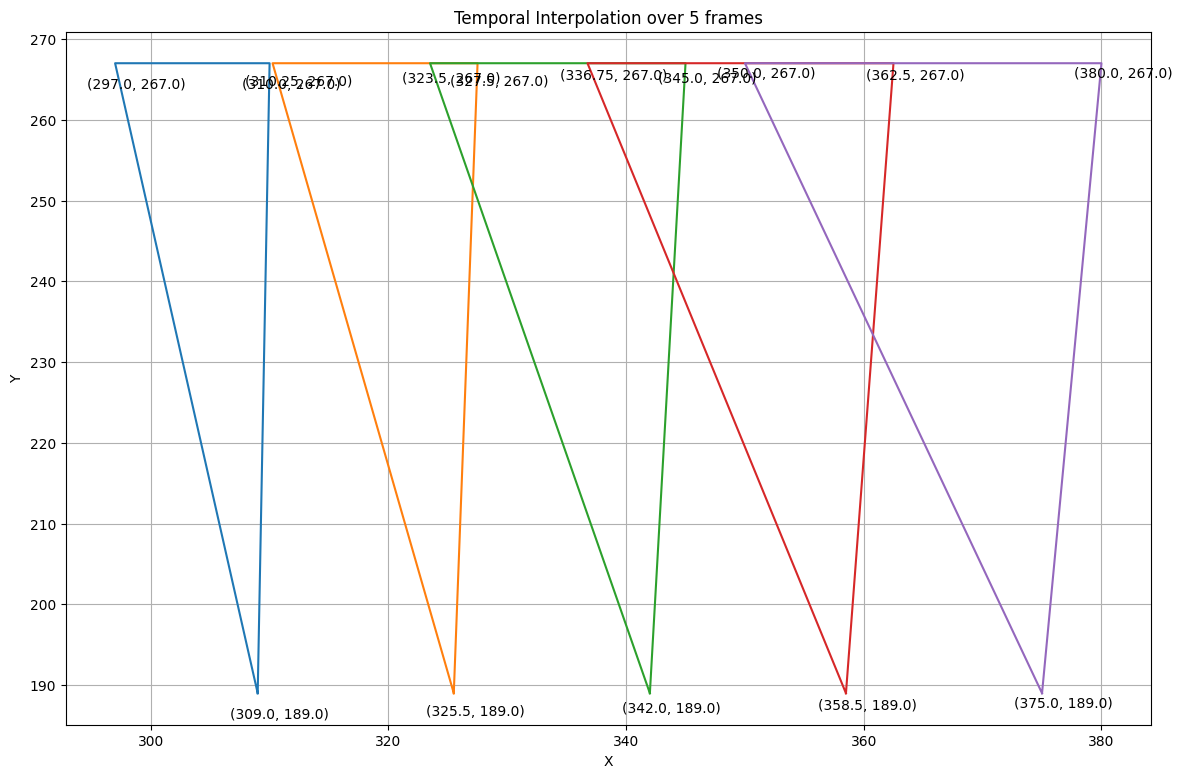

In [67]:
i = 1
plt.figure(figsize=(14, 9))
while i <= 5:
    triangle_x, triangle_y = generateCoordinates(x_1, y_1, x_2, y_2, i)
    print("Frame: ", i)
    print(triangle_x)
    print(triangle_y)
    plt.plot(triangle_x + [triangle_x[0]], triangle_y + [triangle_y[0]]) 
    for j in range(len(x_1)):
        #annotate frame
        plt.annotate(f"({triangle_x[j]}, {triangle_y[j]})", (triangle_x[j] - 3.5 , triangle_y[j]), textcoords="offset points", xytext=(10,(i*2) - 20), ha='left')
    i += 1


plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Temporal Interpolation over 5 frames')

## Alternative Image

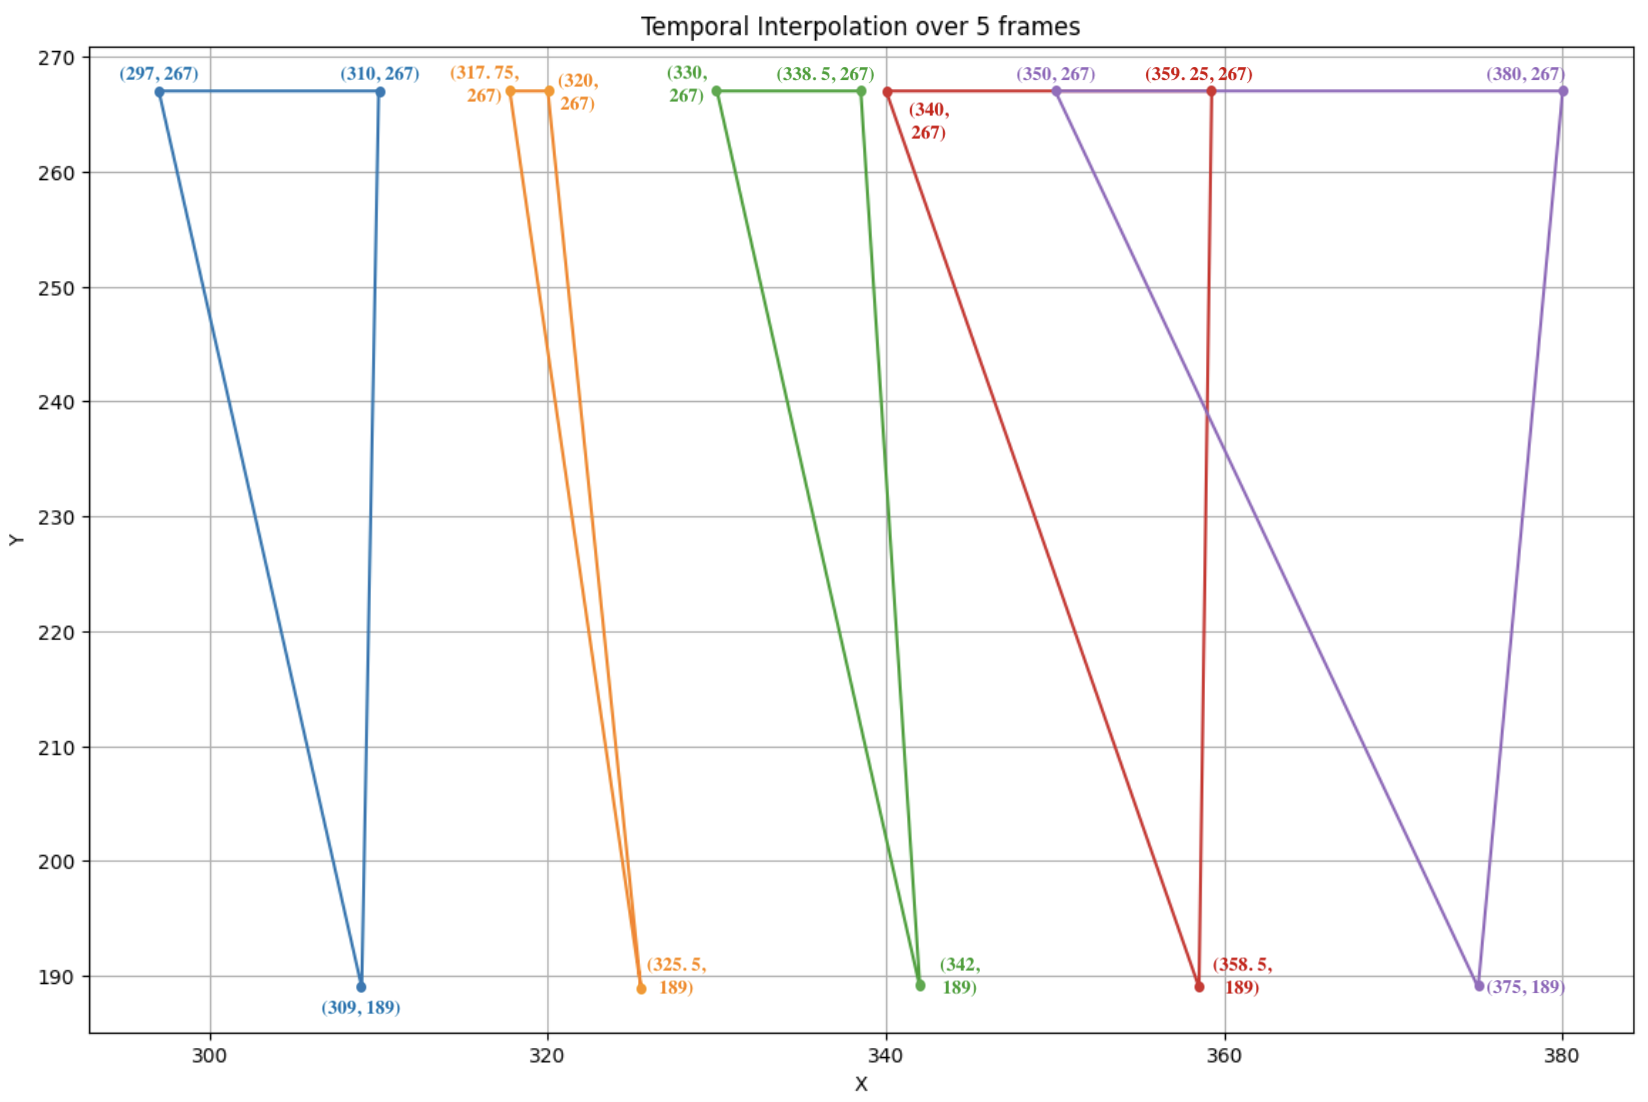

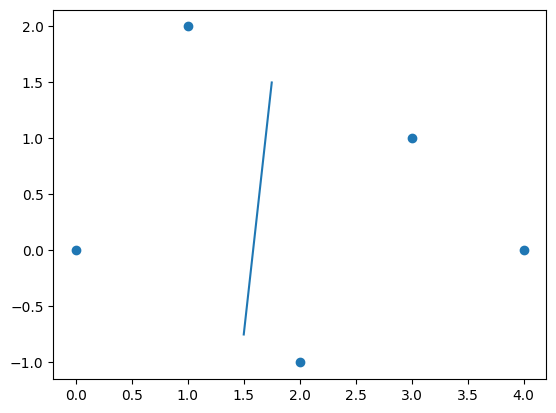

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def chaikin(points, iterations):
    """Apply Chaikin's algorithm to a set of points."""
    for i in range(iterations):
        # Duplicate the first and last points to ensure a closed curve
        points = np.vstack([points[-1], points, points[0]])
        # Apply the algorithm to each pair of points
        left = points[:-2]
        right = points[2:]
        mid1 = left + 0.75 * (right - left)
        mid2 = left + 0.25 * (right - left)
        points = np.vstack([mid1, mid2])
    return points

# Define a set of control points
control_points = np.array([
    [0, 0],
    [1, 2],
    [2, -1],
    [3, 1],
    [4, 0]
])

# Apply Chaikin's algorithm to the control points
iterations = 5
curve_points = chaikin(control_points, 1)

# Interpolate between the curve points
x = curve_points[:, 0]
y = curve_points[:, 1]
t = np.linspace(0, 1, 100)
x_interp = np.interp(t, np.arange(len(x)), x)
y_interp = np.interp(t, np.arange(len(y)), y)

# Plot the results
fig, ax = plt.subplots()
ax.plot(x_interp, y_interp)
ax.scatter(control_points[:, 0], control_points[:, 1])
ax.set_aspect("equal")
plt.show()

In [69]:
print(knots)

NameError: name 'knots' is not defined

In [70]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 5, 2, 1])
t = np.linspace(0, 5, 20)

# Interpolate the data using a B-spline curve with degree 3
spl = BSpline(x, y, k=2)

NameError: name 'BSpline' is not defined

In [71]:
y_interp = spl(t)

NameError: name 'spl' is not defined

In [72]:
print("Initial interpolated values:")
print(y_interp)

Initial interpolated values:
[ 1.50000000e+00  1.47727273e+00  1.45454545e+00  1.43181818e+00
  1.40909091e+00  1.38636364e+00  1.36363636e+00  1.34090909e+00
  1.31818182e+00  1.29545455e+00  1.27272727e+00  1.25000000e+00
  1.22727273e+00  1.20454545e+00  1.18181818e+00  1.15909091e+00
  1.13636364e+00  1.11363636e+00  1.09090909e+00  1.06818182e+00
  1.04545455e+00  1.02272727e+00  1.00000000e+00  9.77272727e-01
  9.54545455e-01  9.31818182e-01  9.09090909e-01  8.86363636e-01
  8.63636364e-01  8.40909091e-01  8.18181818e-01  7.95454545e-01
  7.72727273e-01  7.50000000e-01  7.27272727e-01  7.04545455e-01
  6.81818182e-01  6.59090909e-01  6.36363636e-01  6.13636364e-01
  5.90909091e-01  5.68181818e-01  5.45454545e-01  5.22727273e-01
  5.00000000e-01  4.77272727e-01  4.54545455e-01  4.31818182e-01
  4.09090909e-01  3.86363636e-01  3.63636364e-01  3.40909091e-01
  3.18181818e-01  2.95454545e-01  2.72727273e-01  2.50000000e-01
  2.27272727e-01  2.04545455e-01  1.81818182e-01  1.59090909e

In [73]:
t_new = np.linspace(1, 4, 20) # new sequence of target points
y_interp_new = spl(t_new) # re-evaluate the B-spline curve at the new target points

# Print the updated interpolated values
print("Updated interpolated values:")
print(y_interp_new)

NameError: name 'spl' is not defined

In [108]:
def calculateDistance(x, y):
    """
        Cycles points in 2 directions (forwards and backwards)
        
        Given 2 dimensional arrays, x and y, the "x" and "y" values are a set of arrays 
        containing three points each representing a polygon. This function finds the best mapping 
        from x and y by using the euclidean distance and cycling the points in "y" in a forward and backwards
        direction.
        
        Parameters
        ----------
        x : int array
          A 2-D array containing 3 points on a plane that the user has selected.
            
        y : int array
          A 2-D array containing 3 points that are a representation of what "x" should be after a 
          certain number of frames. 
          
        
        Returns
        -------
        int 
            d_min, the minimum distance between a vertices in x and y
        int
            i_min, the location of the starting vertex where the minimum value occurs from
    
    """
    d_min = math.inf
    i_min = 0
    c_direction = None
    n = len(x)
    
    for i in range(0, n):
        for l in range(0, 2):
            d = 0
            for j in range(0, n):
                current_x = x[j]
                
                # Use foward cycling if 0
                # Use reverse cycling if 1                    
                current_y = y[(i + j) % n] if l == 0 else y[(i - j) % n]
                result = np.array(current_x) - np.array(current_y) 
                d = d + (np.sum(np.square(result))) # Calculate the euclidean distance
            
            if (d < d_min):
                d_min = d
                i_min = i
                c_direction = l
                
            
    return d_min, i_min, c_direction

In [129]:
calculateDistance([[0,0],[0,2],[1,0], [0.5, 0]], [[5,0],[0,4],[6,5], [7,5]])

(142.25, 1, 0)

In [130]:
calculateDistance([[0,0],[0,2],[1,0], [0.5, 0]], [[5,0],[0,4],[6,5], [7,0]])

(117.25, 1, 0)

In [131]:
calculateDistance([[0,0],[0,2],[1,0], [0.5, 0]], [[5,0],[0,4],[7,5], [7,0]])

(130.25, 1, 0)

In [132]:
calculateDistance([[0,0],[0,2],[1,0], [0.5, 0]], [[5,0],[6,5],[7,5], [7,0]])

(173.25, 0, 0)

In [133]:
calculateDistance([[0,0],[0,2],[1,0], [0.5, 0]], [[0,4],[6,5],[7,5], [7,0]])

(164.25, 0, 0)